In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
X,y = make_blobs(n_samples=100,n_features=2,centers=4,random_state=20)

In [42]:
epsilon =5
Min_pts = 5
D= X

def DBSCAN(X,point,epsilon,labels,cluster):
    nbh =[]
    index = []
    for i in range(X.shape[0]):
        if np.linalg.norm(X[point]-X[i])<epsilon:
            nbh.append(X[i])
            index.append(i)
            
    if len(nbh)<Min_pts:
        for i in range(len(labels)):
            if i in index:
                labels[i]=-1
                
    else:
        for i in range(len(labels)):
            if i in index:
                labels[i]=cluster
    return labels            

In [43]:
labels = [0]*X.shape[0]
C=1
for p in range(X.shape[0]):
    if labels[p]==0:
        labels = DBSCAN(X,p,epsilon,labels,C)
        C = C+1

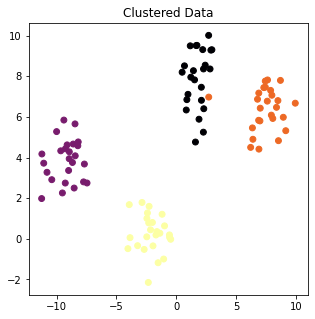

In [44]:
fig,ax = plt.subplots(figsize=(5,5))
ax.set_title("Clustered Data")
ax.scatter(X[:,0],X[:,1],c=labels,s=35,cmap = "inferno")